In [44]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# from community import community_louvain
import community
import os
import csv
from sklearn.preprocessing import LabelEncoder

In [45]:
data_folder = '/home/sunilkarki/Documents/Persn/CProj/bnp/data'

file_path = os.path.join(data_folder, 'transactions1.csv')
blockchain_data = pd.read_csv(file_path)

In [46]:
# Load your blockchain data into a DataFrame (replace 'your_data.csv' with your actual file name or data source)
# blockchain_data = pd.read_csv('your_data.csv')

# Convert hex values to label encoded numeric values
label_encoder = LabelEncoder()

blockchain_data['From'] = label_encoder.fit_transform(blockchain_data['From'])
blockchain_data['To'] = label_encoder.fit_transform(blockchain_data['To'])

blockchain_data['Value (ETH)'] = pd.to_numeric(blockchain_data['Value (ETH)'], errors='coerce')
# blockchain_data['Value (ETH)'] = blockchain_data['Value (ETH)'].div(1000000000000000000).round(4)
blockchain_data['Value (ETH)'] = (blockchain_data['Value (ETH)'] / 1000000000000000000).round(4)

# Select relevant columns for the analysis
selected_columns = ['From', 'To', 'Value (ETH)']
selected_data = blockchain_data[selected_columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


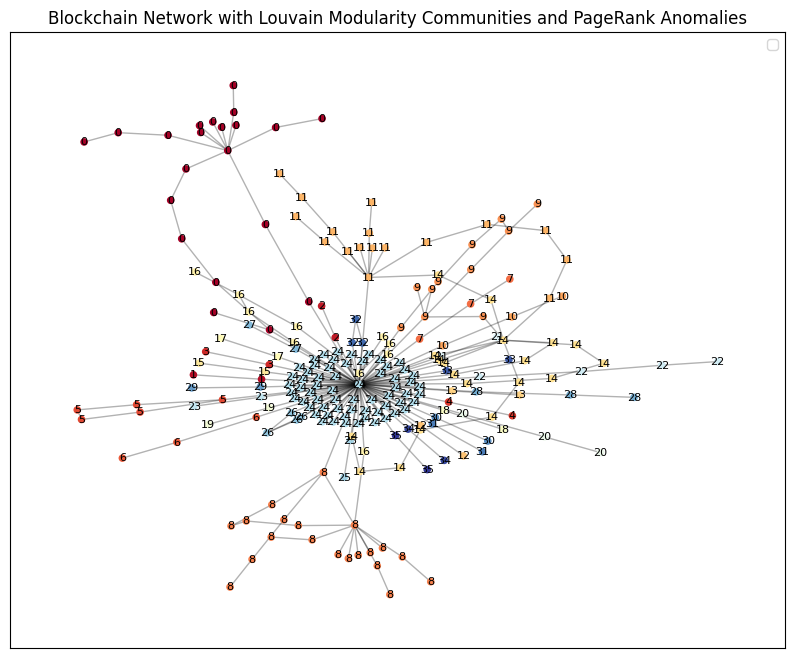

In [47]:

# Create a directed graph from the blockchain data
G = nx.from_pandas_edgelist(blockchain_data, 'From', 'To', ['Value (ETH)'], create_using=nx.Graph())

# Louvain Modularity for Community Detection
partition = community.best_partition(G)

# Add the community information to the blockchain data
blockchain_data['Community'] = blockchain_data['From'].map(partition)

# Visualize the network graph with communities and PageRank scores
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))

# Draw nodes colored by community
nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))

# Draw edges
nx.draw_networkx_edges(G, pos, width=1, alpha=0.3)
# nx.draw_networkx_edges(G, pos, width=1, ax=ax)

# Draw community labels
nx.draw_networkx_labels(G, pos, labels=partition, font_size=8)

plt.title("Blockchain Network with Louvain Modularity Communities and PageRank Anomalies")
plt.legend()
plt.show()


In [48]:
# Calculate PageRank scores
pagerank_scores = nx.pagerank(G)

# Add PageRank scores to the blockchain data
blockchain_data['PageRank'] = blockchain_data['From'].map(pagerank_scores)

# Identify anomalies based on PageRank scores
# You can set a threshold for PageRank scores to determine anomalies
threshold = 0.006
anomaly_data = blockchain_data[blockchain_data['PageRank'] > threshold]

anomaly_data

,Block Number,Transaction Hash,From,To,Value (ETH),Timestamp,Community,PageRank
27,17140930,0xb44280c92c0df5730ef572ddf89c38010e20dd606495...,8,62,0.1704,1682640023,9,0.006059
28,17140930,0xd7605f8f7731eaa6481182d620bb02fe541b1c9b2a16...,8,36,0.0334,1682640023,9,0.006059
45,17140930,0x5c11e22840a707f22473c5a824a409390f918b77452c...,52,61,0.0030,1682640023,0,0.019415
53,17140930,0xd2d516a93286e6c06f24ed7e4a889cf06a4a555d54cd...,22,25,0.0100,1682640023,24,0.194102
89,17140930,0x89689c7b7ca6abfbd726e9be9065409ee67d47d6a94a...,43,22,10.5191,1682640023,9,0.009024
90,17140930,0x89eadf1072a4448446b28b524ff9733eb27b377559d7...,13,22,0.3194,1682640023,8,0.007138
98,17140930,0x302db94e97ddf827854f51b214d02372c4a6b56289a6...,86,22,1.3940,1682640023,11,0.018363
104,17140930,0xe68fa4a555e2907457448768a34ce4f7a1ce2b0ed92a...,137,69,0.0150,1682640023,14,0.014279
155,17140930,0x009bd67baac24154fa92112053d771a551ed03781562...,137,97,0.0150,1682640023,14,0.014279
156,17140930,0x2768d1dc72eb91c1507114aa9275c3a8b12db68ca0c0...,137,72,0.0150,1682640023,14,0.014279


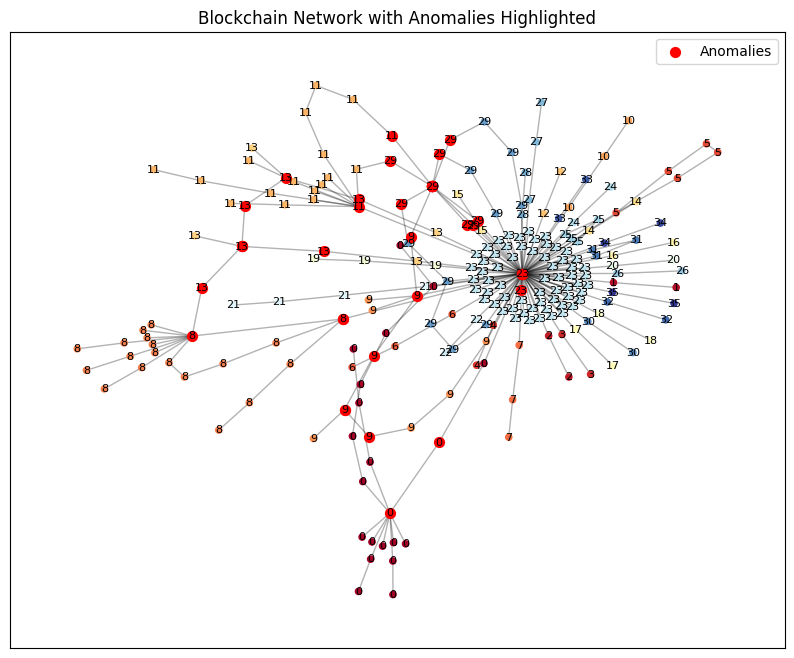

In [49]:
import pandas as pd
import numpy as np
from pyod.models.cblof import CBLOF
import networkx as nx
import community
import matplotlib.pyplot as plt

threshold = 0.006
anomaly_data = blockchain_data[blockchain_data['PageRank'] > threshold]

# Create a directed graph from the blockchain data
G = nx.from_pandas_edgelist(selected_data, 'From', 'To', ['Value (ETH)'], create_using=nx.Graph())

# Louvain Modularity for Community Detection
partition = community.best_partition(G)

# Add the community information to the blockchain data
blockchain_data['Community'] = blockchain_data['From'].map(partition)

# Visualize the network graph with communities
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Draw community labels
nx.draw_networkx_labels(G, pos, labels=partition, font_size=8)

# Highlight anomalies with a different color or marker
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=anomaly_data['From'].tolist() + anomaly_data['To'].tolist(),
    node_size=50,
    node_color='red',
    label='Anomalies'
)

plt.title("Blockchain Network with Anomalies Highlighted")
plt.legend()
plt.show()

In [50]:
# Display the blockchain data with community and anomaly information
anomalies = blockchain_data[blockchain_data['PageRank'] > 0.006]
anomalies.head

<bound method NDFrame.head of      Block Number                                   Transaction Hash  From  \
27       17140930  0xb44280c92c0df5730ef572ddf89c38010e20dd606495...     8   
28       17140930  0xd7605f8f7731eaa6481182d620bb02fe541b1c9b2a16...     8   
45       17140930  0x5c11e22840a707f22473c5a824a409390f918b77452c...    52   
53       17140930  0xd2d516a93286e6c06f24ed7e4a889cf06a4a555d54cd...    22   
89       17140930  0x89689c7b7ca6abfbd726e9be9065409ee67d47d6a94a...    43   
90       17140930  0x89eadf1072a4448446b28b524ff9733eb27b377559d7...    13   
98       17140930  0x302db94e97ddf827854f51b214d02372c4a6b56289a6...    86   
104      17140930  0xe68fa4a555e2907457448768a34ce4f7a1ce2b0ed92a...   137   
155      17140930  0x009bd67baac24154fa92112053d771a551ed03781562...   137   
156      17140930  0x2768d1dc72eb91c1507114aa9275c3a8b12db68ca0c0...   137   
159      17140930  0xdc0f088a2a1ae1f8479227154d5e6b5bea1cc9b677be...   137   
161      17140930  0x6c4460859ee62

In [51]:
blockchain_data.size

2000

In [52]:
max_value = blockchain_data['PageRank'].max()
min_value = blockchain_data['PageRank'].min()

print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")

Maximum Value: 0.19410223433011625
Minimum Value: 0.002160621654582537
